In [1]:
# Import all necessary packages
import xarray as xr; import numpy as np; import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc

In [77]:
# Load in model data
model_nc = xr.open_dataset('~/snowexhackweek_model-eval/contributors/jupflug/LIS_modelOutput_GMClip_2020-02-08.nc')
model_nc

<xarray.Dataset>
Dimensions:            (latitude: 415, longitude: 811)
Coordinates:
    time               datetime64[ns] ...
    lat                (latitude, longitude) float64 ...
    lon                (latitude, longitude) float64 ...
  * longitude          (longitude) float64 -108.3 -108.3 ... -107.5 -107.5
  * latitude           (latitude) float64 38.79 38.79 38.8 ... 39.21 39.21 39.21
Data variables:
    SM_SWE_inst        (latitude, longitude) float32 ...
    SM_SnowDepth_inst  (latitude, longitude) float32 ...
    spatial_ref        int64 ...
Attributes:
    regrid_method:  bilinear

In [3]:
# Load in PointData and LayerData from SnowEx Database
PointData_SWE = pd.read_pickle("PointData_SWE.pkl")
PointData_depth = pd.read_pickle("PointData_depth.pkl")
LayerData_SWE = pd.read_pickle("LayerData_SWE.pkl")

In [92]:
specdate_PointData_SWE = pd.read_pickle('2020_2_8_swe_PointData.pkl')

In [95]:
specdate_PointData_SWE

,site_name,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,...,northing,easting,elevation,utm_zone,geom,time,site_id,version_number,equipment,value
0,Grand Mesa,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4222791,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,...,4.322680e+06,742068.672249,None,12,POINT (742068.672 4322679.574),None,None,None,None,119.363268
1,Grand Mesa,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4219069,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,...,4.322728e+06,742108.256305,None,12,POINT (742108.256 4322727.895),None,None,None,None,242.495899
2,Grand Mesa,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4219070,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,...,4.322728e+06,742108.243236,None,12,POINT (742108.243 4322728.081),None,None,None,None,242.495899
3,Grand Mesa,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4219071,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,...,4.322728e+06,742108.140277,None,12,POINT (742108.140 4322728.296),None,None,None,None,242.495899
4,Grand Mesa,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4219072,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,...,4.322729e+06,742108.044323,None,12,POINT (742108.044 4322728.580),None,None,None,None,241.867683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54651,Grand Mesa,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4226754,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,...,4.322776e+06,742170.538273,None,12,POINT (742170.538 4322775.758),None,None,None,None,224.611608
54652,Grand Mesa,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4226755,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,...,4.322776e+06,742170.337042,None,12,POINT (742170.337 4322775.980),None,None,None,None,225.880584
54653,Grand Mesa,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4226756,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,...,4.322776e+06,742170.135796,None,12,POINT (742170.136 4322776.203),None,None,None,None,228.418570
54654,Grand Mesa,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4226757,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,...,4.322776e+06,742169.934755,None,12,POINT (742169.935 4322776.425),None,None,None,None,228.418570


In [4]:
PointData_SWE

,SWE,date,instrument,latitude,longitude,elevation
0,229.0,2020-01-31,Mala 800 MHz GPR,39.024950,-108.169552,3106.40
1,240.0,2020-01-31,Mala 800 MHz GPR,39.024962,-108.169678,3103.62
2,275.0,2020-01-31,Mala 800 MHz GPR,39.025108,-108.169702,3101.36
3,326.0,2020-01-31,Mala 800 MHz GPR,39.024778,-108.169581,3105.89
4,291.0,2020-01-31,Mala 800 MHz GPR,39.025262,-108.169362,3106.17
...,...,...,...,...,...,...
16141,203.0,2020-02-04,Mala 1600 MHz GPR,39.031349,-108.139465,3147.60
16142,216.0,2020-02-04,Mala 1600 MHz GPR,39.030843,-108.139429,3143.02
16143,161.0,2020-02-04,Mala 1600 MHz GPR,39.031217,-108.139108,3141.90
16144,237.0,2020-02-04,Mala 1600 MHz GPR,39.031177,-108.139100,3141.01


In [102]:
data_of_interest = specdate_PointData_SWE
indices_list = []
SWE_values = []
lat_values = []
long_values = []

for i in range(len(data_of_interest)):
    if data_of_interest.date[i].year == 2020 and data_of_interest.date[i].month == 2 and data_of_interest.date[i].day == 8:
        indices_list.append(i)
        SWE_values.append(data_of_interest['value'][i]/1000)
        lat_values.append(data_of_interest['latitude'][i])
        long_values.append(data_of_interest['longitude'][i])

In [103]:
# np.unique(model_nc.longitude)
# np.unique(model_nc.latitude)

In [104]:
lat_lim_less = 39.01629
lat_lim_great = 39.02229

lon_lim_less = -108.21
lon_lim_great = -108.175

model_nc_smaller_region = model_nc.where((model_nc.latitude >= lat_lim_less) & (model_nc.latitude <= lat_lim_great) 
                        &(model_nc.longitude >= lon_lim_less) & (model_nc.longitude <= lon_lim_great),drop=True)

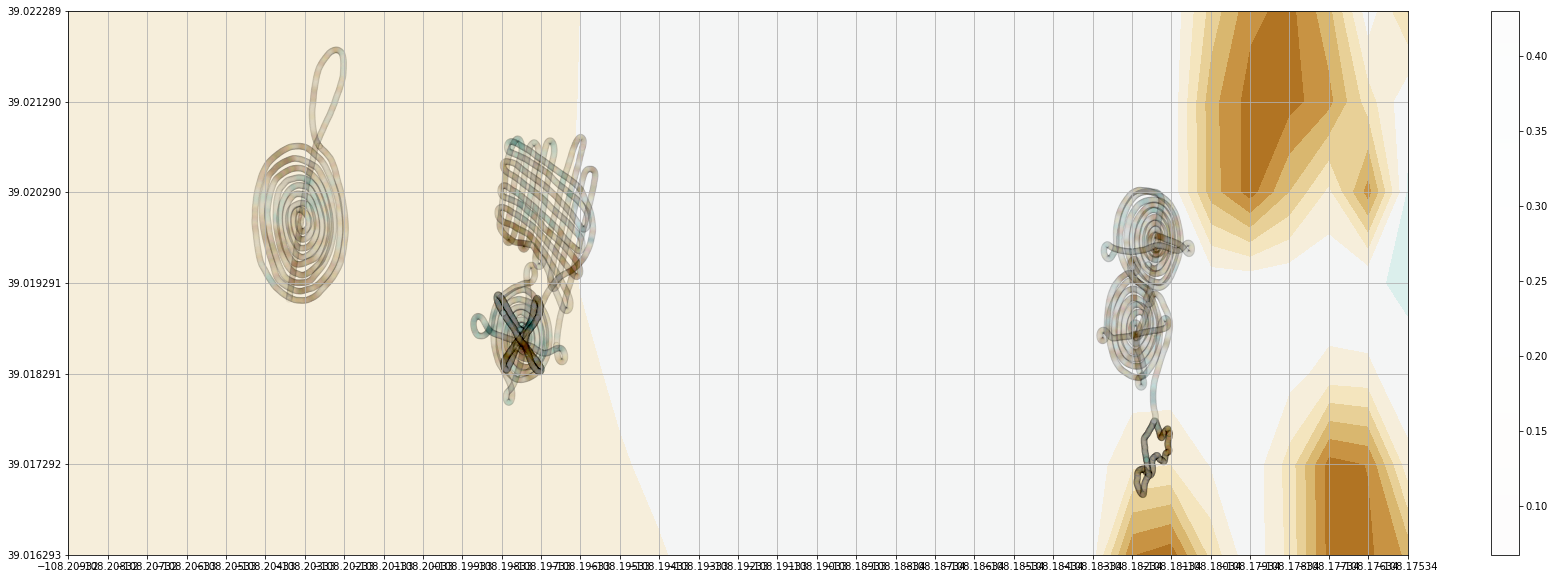

In [119]:
fig, ax = plt.subplots(figsize=(30,10))


plt.contourf(model_nc_smaller_region.longitude, model_nc_smaller_region.latitude, model_nc_smaller_region.SM_SWE_inst,cmap = 'BrBG',vmin=np.nanmin(SWE_values), vmax=np.nanmax(SWE_values))
plt.scatter(long_values, lat_values, c = SWE_values, cmap = 'BrBG', vmin=np.nanmin(SWE_values), vmax=np.nanmax(SWE_values),alpha=0.01, edgecolor = 'k')
plt.colorbar()
plt.xticks(np.unique(model_nc_smaller_region.longitude))
plt.yticks(np.unique(model_nc_smaller_region.latitude))
plt.grid('both')
plt.show()

In [ ]:
# see how many model grids enclose those points

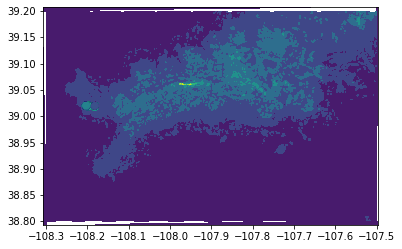

In [96]:
plt.contourf(model_nc.longitude, model_nc.latitude, model_nc.SM_SWE_inst)
plt.scatter(specdate_PointData_SWE.longitude, specdate_PointData_SWE.latitude,c=specdate_PointData_SWE.value)

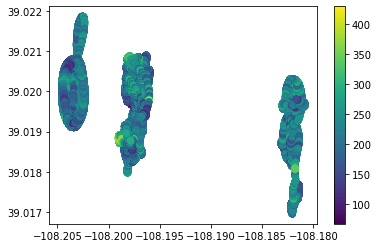

In [97]:
plt.scatter(specdate_PointData_SWE.longitude, specdate_PointData_SWE.latitude,c=specdate_PointData_SWE.value)
plt.colorbar()

In [107]:
np.nanmin(SWE_values)


0.0674520969216331

In [108]:
np.nanmax(SWE_values)

0.430166176641464